# Student Performance Indicator

### Life Cycle of Machine Learning Project

- understanding the problem statement
- Data Collection -> kaggle
- Data Checks to Perform -> missing_values, Duplicates, datatypes, no of unique values in each column,stat of dataset, categories in categorical features
- EDA(visualizations) -> determining numerical and categorical features
- Data Pre-processing -> feature engineering(adding 2 cols-> total_score & Avg)
- Model Training
- Model Selection


## 1) Problem Statement
- the project understands how the student's Performance(test score) is assected by others such as Gender, Ethnicity, Parental level of Education, Lunch and test Prepration course

## 2) Data Collection

- dataset source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- dataset contains columns and 1000 rows

### 2.1) Import Data and Required Package
- Pandas, Numpy, Matplotlib, Seaborn, and Warning Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv(r"D:\Projects\Krish Naik ML Project\Notebook\data\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.2) Exploring the data Integrity & Summary(Univariate)

In [7]:
df.shape

(1000, 8)

In [8]:
df.shape[0]

1000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [56]:
df.describe()

,math_score,reading_score,writing_score,Average
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


<Axes: >

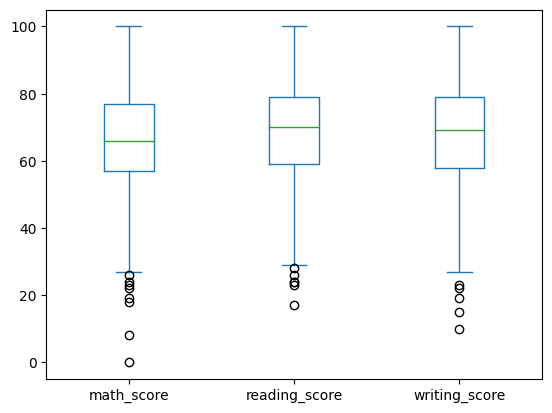

In [57]:
df[['math_score', 'reading_score', 'writing_score']].plot.box()

#### Conclusions : stat
- mean and meadian(50%) are same approximately so Data is symmetrical -> No Heavy Skewness
- math_score minimum is 0 while 25% of students scored 57-> this could be because of some absent students or complexity of paper as other subjects do not show this kind of behaviour
- variation (std) of performance of students is similar in all the subjects

In [76]:
# Is there any missing data?
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
Average                        0
dtype: int64

In [80]:
# Duplicate Rows
df.duplicated().sum()

0

In [14]:
df.sample(20)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
182,female,group E,high school,standard,none,50,50,47
835,female,group C,high school,standard,completed,60,64,74
615,female,group C,high school,standard,none,60,68,72
148,female,group D,bachelor's degree,standard,completed,68,75,81
269,female,group E,some college,free/reduced,none,71,76,70
951,female,group D,some college,standard,completed,75,77,83
961,female,group D,some high school,free/reduced,none,48,54,53
517,female,group E,some college,standard,completed,66,74,73
426,male,group C,bachelor's degree,standard,none,86,83,86
741,female,group A,associate's degree,free/reduced,none,37,57,56


In [19]:
df.iloc[:,5:]

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [21]:
# Categories in Categorical Columns


In [20]:
df["Average"] = (df["math_score"]+df["reading_score"]+df["writing_score"])/3
df["Average"]

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average, Length: 1000, dtype: float64

# Group Dynamics(Bivariate Analysis)
- topper in maths
- Overall topper
- Boys V/s Girls in Maths
- performance of students with standard lunch (Nutritional Impact)
- Parental Influence over student performance
- Success Rate of students who completed test_preparation_course compared to those who did none

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [38]:
# those students who score 100!
df[df["math_score"] == df["math_score"].max()]
(toppers.shape[0]/df.shape[0])*100

5.800000000000001

In [37]:
# students who score above 90
toppers = df[df["math_score"].between(90,100)]
toppers.shape[0]
(toppers.shape[0]/df.shape[0])*100

5.800000000000001

In [36]:
# students who score above 90
toppers = df[df["math_score"].between(75,100)]
(toppers.shape[0]/df.shape[0])*100

29.5

In [41]:
# Overall Topper
df[df['Average'] == df['Average'].max()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Average
458,female,group E,bachelor's degree,standard,none,100,100,100,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.0
962,female,group E,associate's degree,standard,none,100,100,100,100.0


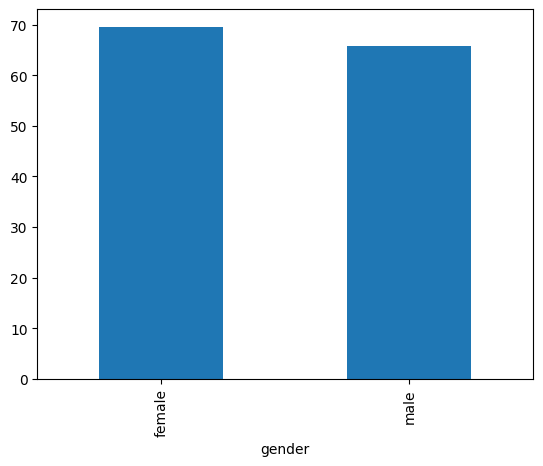

In [54]:
x = ((df.groupby("gender").sum()['Average'])/(df.groupby("gender").count()['Average'])).plot.bar()

<Axes: xlabel='math_score', ylabel='writing_score'>

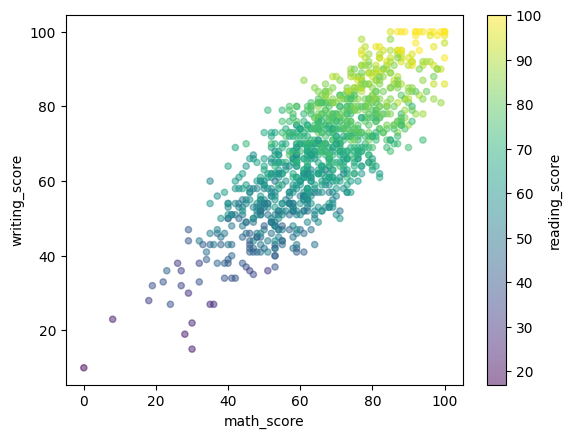

In [ ]:
df.plot.scatter(x='math_score', y='writing_score', alpha=0.5, c='reading_score', colormap='viridis')
# writing_score is proportional to math_score because of linear sort of relationship between them

<Axes: xlabel='lunch'>

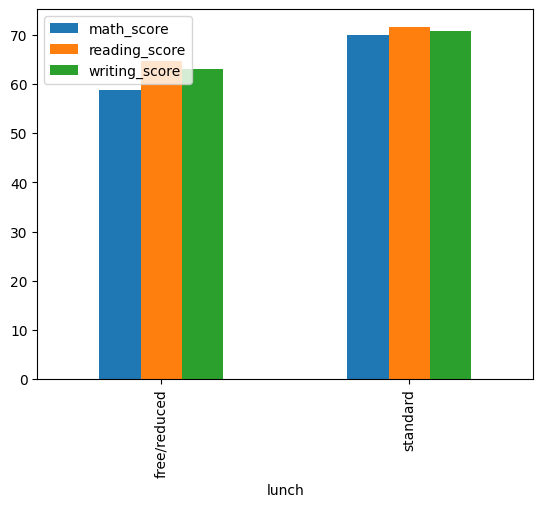

In [72]:
df.groupby("lunch")[['math_score', 'reading_score', 'writing_score']].mean().plot.bar()


- All three subjects grades of students who eats standard lunch is clearly greater than the students who eats free/reduced/Malnutritioned food

In [82]:
# Parental Influence
parental_influence = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean().sort_values(by='math_score')
parental_influence

,math_score,reading_score,writing_score
parental_level_of_education,,,
high school,62.137755,64.704082,62.448980
some high school,63.497207,66.938547,64.888268
some college,67.128319,69.460177,68.840708
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
master's degree,69.745763,75.372881,75.677966


<Axes: xlabel='parental_level_of_education'>

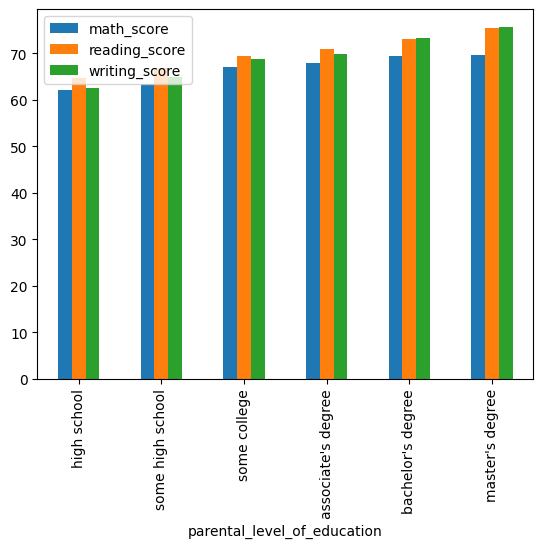

In [85]:
parental_influence.plot.bar()